# An introduction to time series forecasting with PyAF

This is an introduction to time series forecasting with PyAF. 
We describe the basic vocabulary used and give simple examples.


## Problem Setting


The main problem to be solved with a forecasting tool is to predict the future values of a quantity of interest called 'Signal' over a period of time called 'Horizon' (predict the shop sales over next 7 days).

Usually all available (mainly past) data on the signal can be used to perform the forecasting task, even external related signals can be used (called exogenous signals, weather data can be used to predict ice-cream sales).

The time itself can also be used. Some time information can be helpful : sundays, holidays, quarter of the year etc. Future values of time-based data are usually known.

Time series models are mathematical concepts that can used to compute the future values. They summarize a pattern that can be observed in the data in a regular way. Example time series models :
 - Linear trend : next future valeus are obtained by extrapolating a straight line fitted on known signal data.
 - Cycles : future values follow a periodic pattern (one value for each day of the week, for example).
 - Moving Average : Some combination of previous signal values (average sales of previous 7 days).
 - Naive model : the predicted value for tomorrow is today value. 
 - ...

Automatic forecasting is about testing a lot of possible time series models and selecting the best model based on its forecast quality (difference between predicted and actual values). 


## Forecasting with PyAF


PyAF uses a machine learning approach to perform the forecasting task. It starts by building a time series model based on past values (training process) and then uses this model to generate the future values (forecast).

A typical PyAF use case can sketched the following way :

[read CSV file or table in database ] => [Pandas Dataframe , DF] => [train a model M using DF ] => [forecast DF using M] => [Pandas Dataframe containing Forecasts , FC] => [save FC to a csv file or a database]

The first two and last two operations are Pandas generic data access tasks and are not part of PyAF. PyAF is only concerned with training the mdoel and using it to forecast the signal.

A pandas dataframe object is a very sophisticated representation of the dataset. It allows a lot of possible manipulations on the data. Almost everything that can be done in a spreadsheet or a database (SQL) is possible, in python, using this object. It can be seen an abstarct unifying view of columnar data such as disk files and database tables. 

For a serious introduction to pandas objects see http://pandas.pydata.org/pandas-docs/stable/dsintro.html.


## PyAF Use Cases


### PyAF on the Ozone dataset


Here , we take a standard use case, of ozone data in LA (https://datamarket.com/data/set/22u8/ozon-concentration-downtown-l-a-1955-1972). This is a popular dataset that gives the  monthly average of ozone concentration in LA from January 1955 to Dec 1972.  

The Ozone dataset is available as a comma separated values (CSV) file from the link below.

First , we load the dataset int a pandas dataframe object.

In [1]:
# insert some logging
import logging
import logging.config

# remove the notebook root logger.
logger = logging.getLogger()
logger.handlers = []

# set default level
logging.basicConfig(level=logging.INFO)

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/ozone-la.csv"
ozone_dataframe = pd.read_csv(csvfile_link);

This dataset has two columns : 'Month' and 'Ozone'. 

In [3]:
ozone_dataframe.head()

,Month,Ozone
0,1955-01,2.7
1,1955-02,2.0
2,1955-03,3.6
3,1955-04,5.0
4,1955-05,6.5


We see here that the column 'Month' is not really a datetime column (strange date format). Pandas prvides the necessary tools to 'normalize' this column on the fly (ISO date format) :

In [4]:
import datetime
ozone_dataframe['Month'] = ozone_dataframe['Month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m"))
ozone_dataframe.head()


,Month,Ozone
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5


Pandas provides also some plotting capabilities 

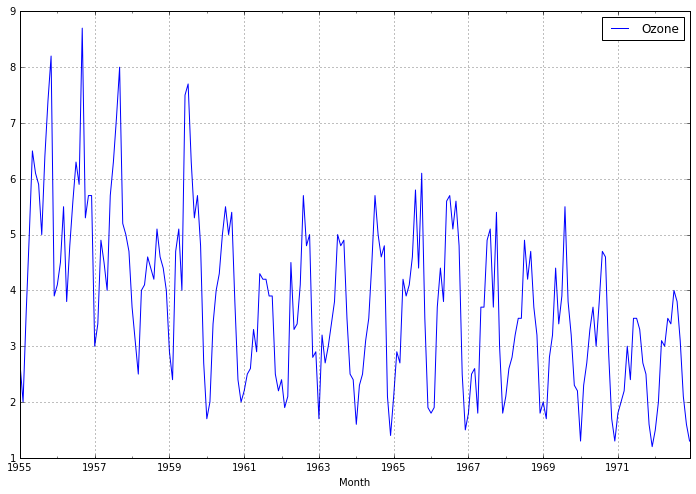

In [5]:
%matplotlib inline  
ozone_dataframe.plot.line('Month', ['Ozone'], grid = True, figsize=(12, 8))


Now, we can build/train a time series model with PyAF to forecast the next 12 values:


In [6]:
import pyaf.ForecastEngine as autof
lEngine = autof.cForecastEngine()
lEngine.train(ozone_dataframe , 'Month' , 'Ozone', 12);

INFO:pyaf.std:START_TRAINING 'Ozone'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Ozone' 3.3906853199005127


At this point, PyAF has tested all possible time series models and selected the best one. The whole process took about 7 seconds in this test.

to predict the next values using this model and show the last 20 values :


In [7]:
ozone_forecast_dataframe = lEngine.forecast(ozone_dataframe, 12);
ozone_forecast_dataframe.tail(20)

,Month,Ozone,_Ozone,row_number,Month_Normalized,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear_residue_NoAR,...,_Ozone_Cycle,_Ozone_Cycle_residue,_Ozone_AR,_Ozone_AR_residue,_Ozone_TransformedForecast,_Ozone_TransformedResidue,Ozone_Forecast,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound
208,1972-05-01,3.5,3.500000,208,1.283976,2.583939,0.916061,-0.068397,9.844588e-01,0.0,...,-0.068397,9.844588e-01,0.0,9.844588e-01,2.515541,0.984459,2.515541,0.984459,NaN,NaN
209,1972-06-01,3.4,3.400000,209,1.290264,2.572114,0.827886,0.779142,4.874450e-02,0.0,...,0.779142,4.874450e-02,0.0,4.874450e-02,3.351255,0.048745,3.351255,0.048745,NaN,NaN
210,1972-07-01,4.0,4.000000,210,1.296349,2.560670,1.439330,1.347728,9.160165e-02,0.0,...,1.347728,9.160165e-02,0.0,9.160165e-02,3.908398,0.091602,3.908398,0.091602,NaN,NaN
211,1972-08-01,3.8,3.800000,211,1.302637,2.548846,1.251154,1.241529,9.625592e-03,0.0,...,1.241529,9.625592e-03,0.0,9.625592e-03,3.790374,0.009626,3.790374,0.009626,NaN,NaN
212,1972-09-01,3.1,3.100000,212,1.308925,2.537021,0.562979,1.376430,-8.134513e-01,0.0,...,1.376430,-8.134513e-01,0.0,-8.134513e-01,3.913451,-0.813451,3.913451,-0.813451,NaN,NaN
213,1972-10-01,2.1,2.100000,213,1.315010,2.525578,-0.425578,0.980181,-1.405759e+00,0.0,...,0.980181,-1.405759e+00,0.0,-1.405759e+00,3.505759,-1.405759,3.505759,-1.405759,NaN,NaN
214,1972-11-01,1.6,1.600000,214,1.321298,2.513753,-0.913753,-0.246455,-6.672975e-01,0.0,...,-0.246455,-6.672975e-01,0.0,-6.672975e-01,2.267297,-0.667297,2.267297,-0.667297,NaN,NaN
215,1972-12-01,1.3,1.300000,215,1.327383,2.502309,-1.202309,-1.181166,-2.114364e-02,0.0,...,-1.181166,-2.114364e-02,0.0,-2.114364e-02,1.321144,-0.021144,1.321144,-0.021144,NaN,NaN
216,1973-01-01,NaN,0.811919,216,1.333671,2.490485,-1.678565,-1.678565,0.000000e+00,0.0,...,-1.678565,0.000000e+00,0.0,0.000000e+00,0.811919,0.000000,0.811919,0.000000,-0.487018,2.110857
217,1973-02-01,NaN,1.054776,217,1.339959,2.478660,-1.423883,-1.423883,0.000000e+00,0.0,...,-1.423883,0.000000e+00,0.0,0.000000e+00,1.054776,0.000000,1.054776,0.000000,-0.244161,2.353714


Here, we see that 
1. The last 12 values of the 'Month' column have been filled on a monthly basis for the next year (1973). 
2. The last 12 values of the 'Ozone' column are empty or unknown ('Nan').
3. A lot of extra columns have been computed



The most impostant new column is 'Ozone_Forecast', we can tsee the last rows of this column as well as the time and signal columns :

In [8]:
ozone_forecast_dataframe[['Month' , 'Ozone' , 'Ozone_Forecast']].tail(20)

,Month,Ozone,Ozone_Forecast
208,1972-05-01,3.5,2.515541
209,1972-06-01,3.4,3.351255
210,1972-07-01,4.0,3.908398
211,1972-08-01,3.8,3.790374
212,1972-09-01,3.1,3.913451
213,1972-10-01,2.1,3.505759
214,1972-11-01,1.6,2.267297
215,1972-12-01,1.3,1.321144
216,1973-01-01,NaN,0.811919
217,1973-02-01,NaN,1.054776


The predicted value for '1973-01-01' is then '0.811919' , etc

It is possible to plot the forecast against the signal toc check the 'visual' quality of the model and see the prediction intervals

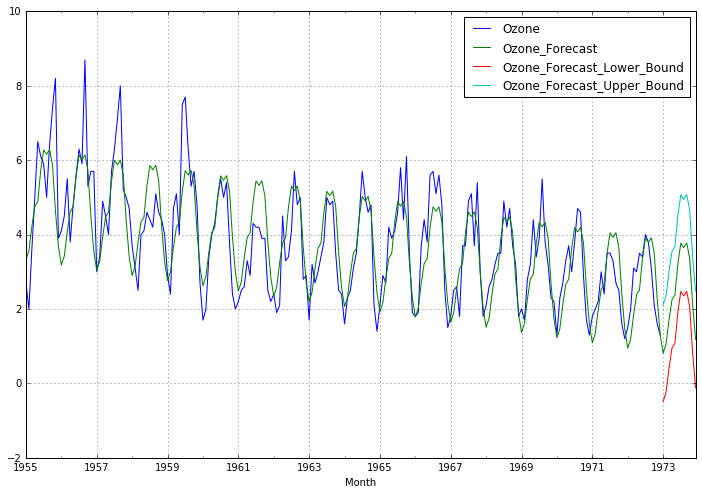

In [9]:
ozone_forecast_dataframe.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))

Finally, one can the save the forecasts datafrma eto a CSV file or a database :

In [10]:
ozone_forecast_dataframe.to_csv("ozone_forecast.csv")

### PyAF on some stock value

Using Yahoo Finance all public stock data are available. Here we give an exsample of how one can use PyAF to predict the future values of a popular stock (GOOG).

In [11]:
goog_link = "http://chart.finance.yahoo.com/table.csv?s=GOOG&a=8&b=14&c=2015&d=9&e=14&f=2016&g=d&ignore=.csv"
import pandas as pd
goog_dataframe = pd.read_csv(goog_link);
goog_dataframe['Date'] = goog_dataframe['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
goog_dataframe.sort_values(by = 'Date' , ascending=True, inplace=True)
goog_dataframe.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
4,2016-10-10,777.710022,789.380005,775.869995,785.940002,1174900,785.940002
3,2016-10-11,786.659973,792.280029,780.580017,783.070007,1372500,783.070007
2,2016-10-12,783.760010,788.130005,782.059998,786.140015,937400,786.140015
1,2016-10-13,781.219971,781.219971,773.000000,778.190002,1365300,778.190002
0,2016-10-14,781.650024,783.950012,776.000000,778.530029,852500,778.530029


We needed to tranform the date column and sort values in increasing order (the yahoo API gives most recent values first).

We are interested in getting the future values of the 'Close' column over the next 7 days:

In [12]:
import pyaf.ForecastEngine as autof
lEngine = autof.cForecastEngine()
lEngine.train(goog_dataframe , 'Date' , 'Close', 7);

INFO:pyaf.std:START_TRAINING 'Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close' 5.892079591751099


The predicted values are :

In [13]:
goog_forecast_dataframe = lEngine.forecast(goog_dataframe, 7);

We can see the forecasts data for last 7 days 

In [14]:
goog_forecast_dataframe[['Date' , 'Close' , 'Close_Forecast']].tail(7)

,Date,Close,Close_Forecast
276,2016-10-15 10:45:58.878504,NaN,778.530029
277,2016-10-16 21:31:57.757008,NaN,778.530029
278,2016-10-18 08:17:56.635512,NaN,778.530029
279,2016-10-19 19:03:55.514016,NaN,778.530029
280,2016-10-21 05:49:54.392520,NaN,778.530029
281,2016-10-22 16:35:53.271024,NaN,778.530029
282,2016-10-24 03:21:52.149528,NaN,778.530029


One can see that all the values are equal to the last value (naive model). Forecasting finance data is not easy!!!

If you are curious enough, you can see more info about the model :

In [15]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2015-09-14 00:00:00 TimeMax=2016-07-20 00:00:00 TimeDelta=1 days 10:45:58.878504 Estimation = (0 , 215) Validation = (215 , 269) Test = (269 , 276) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Close' Min=594.890015 Max=787.210022  Mean=724.902463822 StdDev=41.9533905637
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_Lag1Trend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0108 MAPE_Forecast=0.0055 MAPE_Test=0.005
INFO:pyaf.std:MODEL_L2 L2_Fit=10.5037925173 L2_Forecast=6.02910107653 L2_Test=5.37507231423
INFO:pyaf.std:MODEL_COMPLEXITY 32
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_DETAIL_END


Again, one can plot the forecasts against the signal:

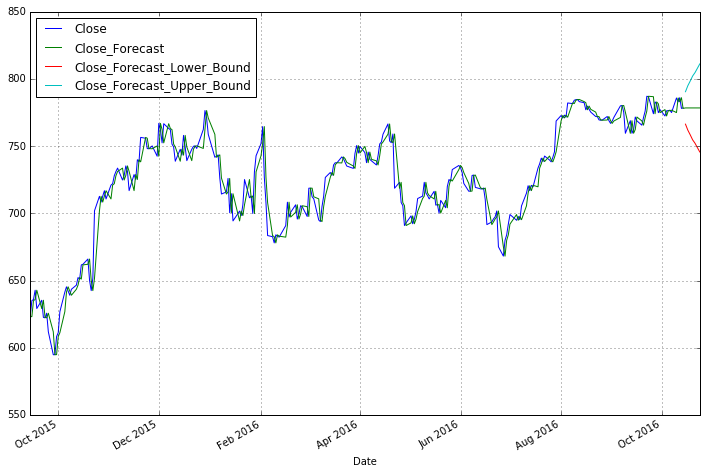

In [16]:
goog_forecast_dataframe.plot.line('Date', ['Close' , 'Close_Forecast', 
                                             'Close_Forecast_Lower_Bound', 
                                             'Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))